# <p style="background-color: #FF8C00; font-family: Times New Roman; color: black; font-size: 120%; text-align: center; border-radius: 16px 16px; padding: 16px;"><strong>Introduction: Logistic Regression</strong></p>

# 1. What is Logistic Regression?
- Logistic Regression is a classification algorithm, not a regression algorithm (despite the name).
- It predicts categorical outcomes, especially:
    - Binary classification (0 or 1)
    - Yes / No
    - Spam / Not spam
    - Disease / No disease
    - Positive / Negative sentiment

# 2. Why is it called "Regression"?
- Because the model uses a linear equation, but instead of predicting a number, it passes the output through a sigmoid function to convert it into a probability.

# 3. Logistic Regression Formula
- Step 1 — Linear part:
                        𝑧=𝑤𝑋+𝑏
- Step 2 — Apply sigmoid:
            $ 𝑦^=𝜎(𝑧) = \frac{1}{1 + e^{-(z)}}$


- Where:
    - ŷ = predicted probability (between 0 and 1)
    - If ŷ ≥ 0.5 → class = 1
    - If ŷ < 0.5 → class = 0

- Sigmoid Function
    - The sigmoid (logistic) function maps any number to the range (0 → 1).
        - If input is large positive → output ≈ 1
        - If input is large negative → output ≈ 0
        - If input is near 0 → output ≈ 0.5

# 4. What Logistic Regression Learns?

- The model learns:
    - Weights (W)
    - Bias (b)
- Such that predicted probabilities match real labels as close as possible.
- It uses:
    - Cross-entropy loss (log loss)
    - Gradient descent to optimize the weights

# 5. Use Cases
    - Spam detection
    - Fraud detection
    - Disease diagnosis
    - Sentiment analysis
    - Customer churn prediction
    - Predicting pass/fail

# Logistic Regression on heart.csv — Full Working Cod

## 1) Import Libraries

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

## 2) Load the dataset

In [32]:
df = pd.read_csv("heart.csv")

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


| Feature  | الشرح                  |
| -------- | ---------------------- |
| age      | عمر المريض             |
| sex      | الجنس (1 ذكر – 0 أنثى) |
| cp       | نوع ألم الصدر          |
| trestbps | ضغط الدم               |
| chol     | الكوليسترول            |
| fbs      | سكر صائم               |
| restecg  | رسم قلب                |
| thalach  | أعلى معدل نبض          |
| exang    | ألم مع المجهود         |
| oldpeak  | انخفاض ST              |
| slope    | ميل ST                 |
| ca       | عدد الأوعية المتضيقة   |
| thal     | حالة الثاليوم          |
| target   | 1 = مريض قلب، 0 = سليم |

- Logistic Regression
- الغرض من النموذج يتعلم العلاقة بين هذه العوامل وهل المريض مصاب (1) أم غير مصاب (0).

## 3) Split data into Features (X) and Target (y)

In [33]:
X = df.drop("target", axis=1)
y = df["target"]

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [34]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## 4) Train-Test Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Note:
- Scaling is the process of normalizing numeric features so they all have a similar range.

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5) Build Logistic Regression Model

In [57]:
model = LogisticRegression(max_iter=1000)

In [58]:
# Train the model
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## 6) Predictions

In [59]:
y_pred = model.predict(X_test_scaled)

## 7) Evaluation

In [60]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8525

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## 8) Confusion Matrix

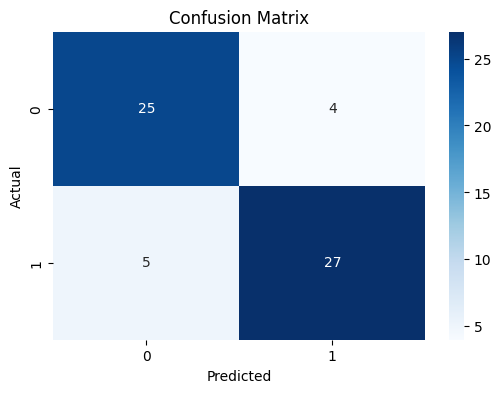

In [61]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 9) Save model

In [28]:
# Save model
joblib.dump(model, "heart_model.joblib")
print("Model saved as heart_model.joblib")

Model saved as heart_model.joblib


## 10) Loading the saved model

In [29]:
import joblib

loaded_model = joblib.load("heart_model.joblib")
print("Model loaded successfully!")

Model loaded successfully!


## 11) Testing the loaded model on new values

In [30]:
import numpy as np

# Example patient data
# [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]
new_patient = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]])

prediction = loaded_model.predict(new_patient)
proba = loaded_model.predict_proba(new_patient)

print("Prediction (0 = No heart disease, 1 = Heart disease):", prediction[0])
print("Probability:", proba)

Prediction (0 = No heart disease, 1 = Heart disease): 1
Probability: [[0.23365252 0.76634748]]


C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Applay the following Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib
# Load dataset
df = pd.read_csv("heart.csv")
# Features and target
X = df.drop("target", axis=1)
y = df["target"]
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
# Evaluate accuracy
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
# Example Test: patient data
new_patient = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]])
prediction = model.predict(new_patient)
proba = model.predict_proba(new_patient)
print("Prediction:", prediction)
print("Probability:", proba)